In [ ]:
# 1. Instala a biblioteca (caso necessário)
!pip install google-cloud-bigquery
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy

In [ ]:
# 2. Autenticação
from google.colab import auth
auth.authenticate_user()

In [ ]:
# 3. Conecta ao BigQuery
from google.cloud import bigquery
client = bigquery.Client(project="my-project-laboratoria")

# 4. Consulta a VIEW no BigQuery
query = """
SELECT
user_id,
default_flag,
faixa_etaria,
total_emprestimos,
qtd_imoveis_emprestimos,
qtd_outros_emprestimos,
more_90_days_overdue,
number_times_delayed_payment_loan_30_59_days,
number_times_delayed_payment_loan_60_89_days,
age_tratado,
salary_tratado,
using_lines_tratado,
debt_ratio_tratado,
dependents_tratado,
score_risco_total,
flag_alto_risco_binaria,
classificacao_risco
FROM `my-project-laboratoria.dadoslaboratorioproject03.tb_score_dummy`
"""

# 5. Executa a query e mostra os dados como DataFrame
df = client.query(query).to_dataframe()
df.head()

,user_id,default_flag,faixa_etaria,total_emprestimos,qtd_imoveis_emprestimos,qtd_outros_emprestimos,more_90_days_overdue,number_times_delayed_payment_loan_30_59_days,number_times_delayed_payment_loan_60_89_days,age_tratado,salary_tratado,using_lines_tratado,debt_ratio_tratado,dependents_tratado,score_risco_total,flag_alto_risco_binaria,classificacao_risco
0,18876,0,21-29,0,0,0,0,0,0,21.0,5416.0,1.0,1.919482,0.0,5,1,Risco Extremamente Alto
1,35568,0,21-29,0,0,0,0,0,0,22.0,1600.0,1.0,0.000000,0.0,9,1,Risco Extremamente Alto
2,28253,0,21-29,0,0,0,0,0,0,24.0,1000.0,1.0,0.000000,0.0,11,1,Risco Extremamente Alto
3,32745,0,21-29,0,0,0,1,0,0,29.0,4700.0,1.0,0.000000,0.0,8,1,Risco Extremamente Alto
4,17717,1,30-39,0,0,0,4,0,0,30.0,1706.0,1.0,0.185120,2.5,12,1,Risco Extremamente Alto


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  Int64  
 1   default_flag                                  36000 non-null  Int64  
 2   faixa_etaria                                  36000 non-null  object 
 3   total_emprestimos                             36000 non-null  Int64  
 4   qtd_imoveis_emprestimos                       36000 non-null  Int64  
 5   qtd_outros_emprestimos                        36000 non-null  Int64  
 6   more_90_days_overdue                          36000 non-null  Int64  
 7   number_times_delayed_payment_loan_30_59_days  36000 non-null  Int64  
 8   number_times_delayed_payment_loan_60_89_days  36000 non-null  Int64  
 9   age_tratado                                   36000 non-null 

In [ ]:
df.describe()

,user_id,default_flag,total_emprestimos,qtd_imoveis_emprestimos,qtd_outros_emprestimos,more_90_days_overdue,number_times_delayed_payment_loan_30_59_days,number_times_delayed_payment_loan_60_89_days,age_tratado,salary_tratado,using_lines_tratado,debt_ratio_tratado,dependents_tratado,score_risco_total,flag_alto_risco_binaria
count,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.0,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.0,36000.0
mean,18000.5,0.018972,8.4815,1.015611,7.465889,0.260806,0.419278,0.237861,52.416500,5885.870972,0.318393,0.667890,0.658528,4.0,0.782389
std,10392.449182,0.136429,5.181132,1.118363,4.799922,4.121365,4.14402,4.105515,14.788392,3050.977270,0.353820,0.693963,0.907417,2.919135,0.412627
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,9000.75,0.0,5.0,0.0,4.0,0.0,0.0,0.0,41.000000,3900.000000,0.029526,0.176265,0.000000,2.0,1.0
50%,18000.5,0.0,8.0,1.0,7.0,0.0,0.0,0.0,52.000000,5416.000000,0.149655,0.366169,0.000000,4.0,1.0
75%,27000.25,0.0,11.0,2.0,10.0,0.0,0.0,0.0,63.000000,7416.000000,0.548529,0.873552,1.000000,6.0,1.0
max,36000.0,1.0,57.0,25.0,56.0,98.0,98.0,98.0,96.000000,12690.000000,1.327033,1.919482,2.500000,15.0,1.0


###Análise exploratória

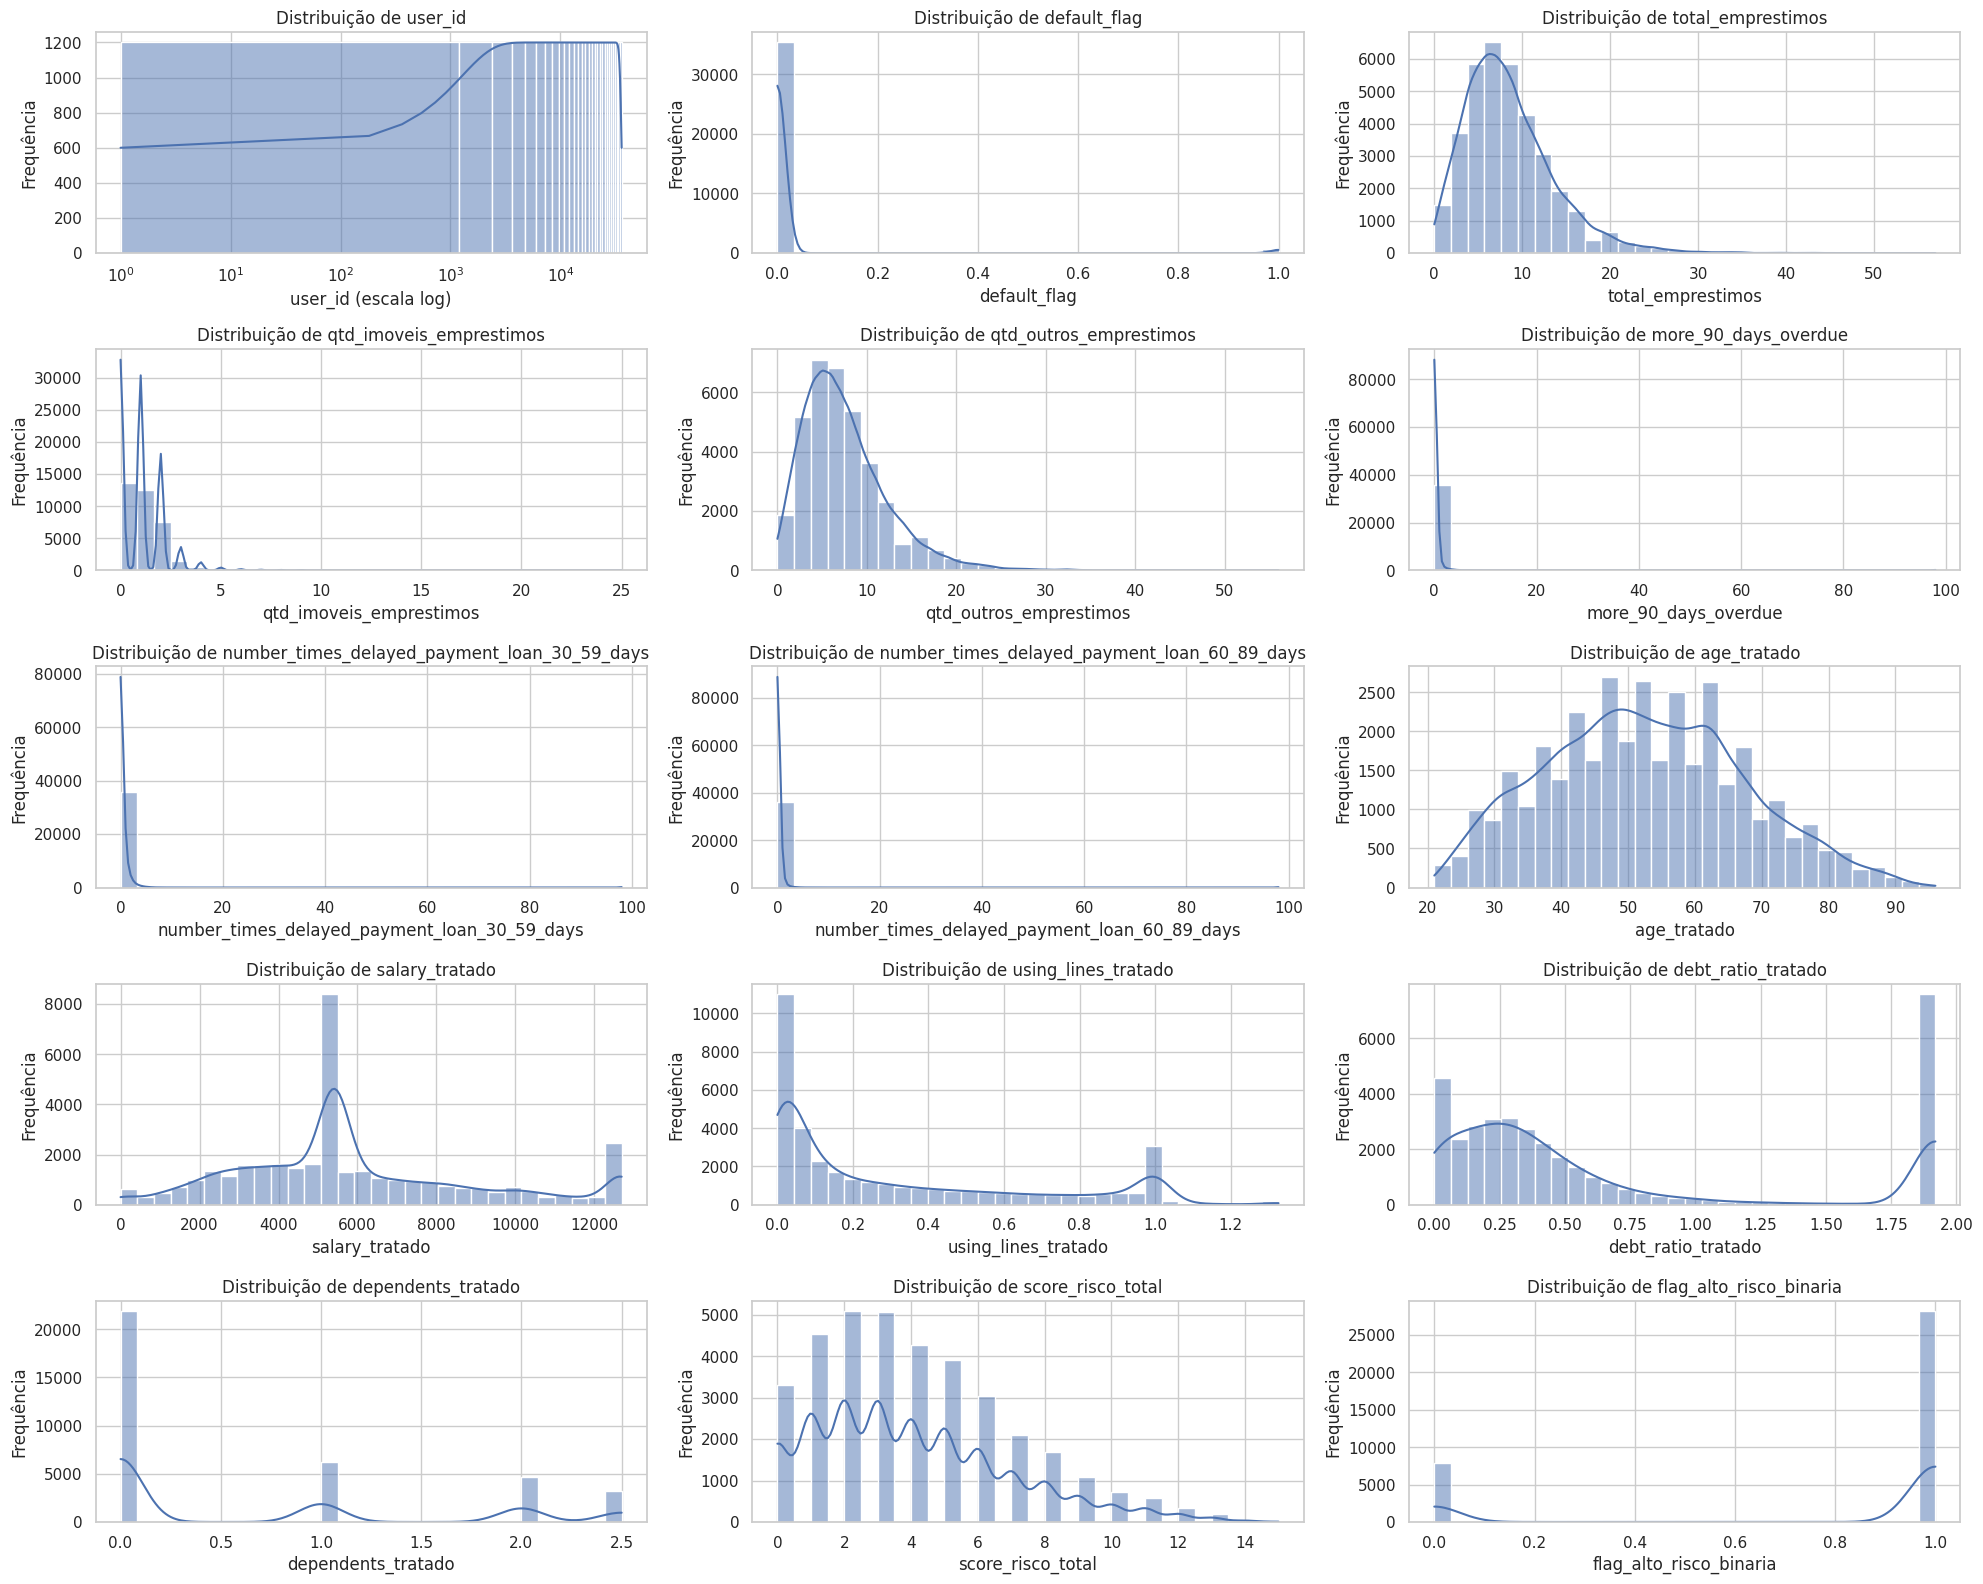

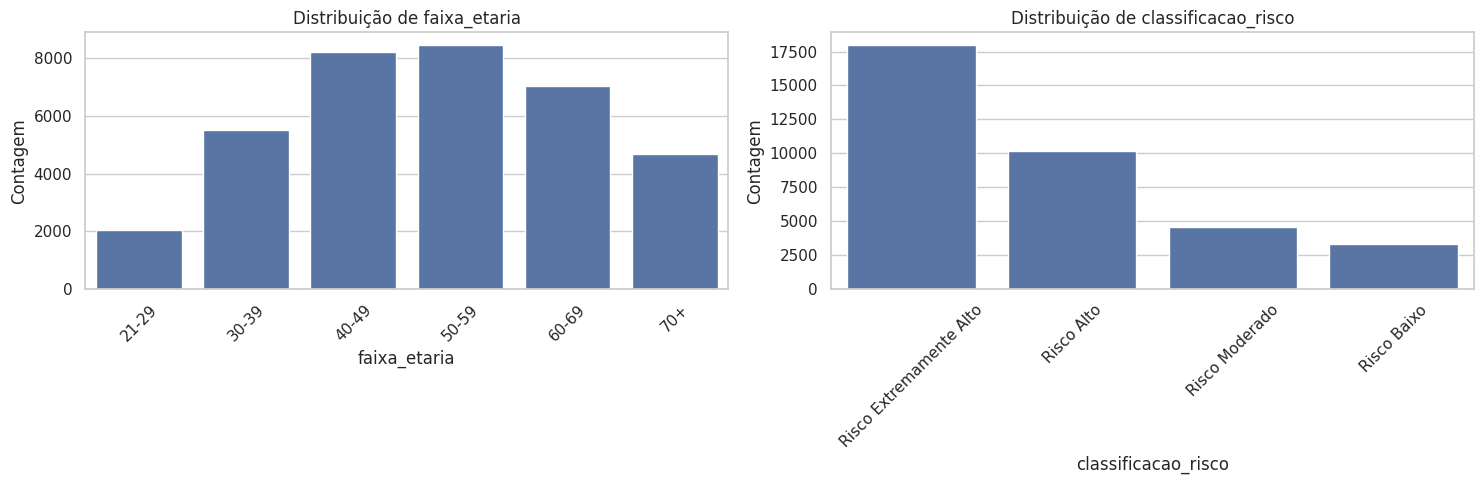

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(20, 25))

# Lista de colunas numéricas (excluindo object e mantendo Int64, float64)
numeric_cols = df.select_dtypes(include=['int64', 'Int64', 'float64']).columns


# Criar histogramas para cada variável numérica
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Ajustar escala para variáveis com grande variação (com verificação segura)
    col_min = df[col].min()
    if col_min != 0:  # Só verifica a razão se o mínimo não for zero
        col_ratio = df[col].max() / col_min
        if col_ratio > 1000 and col_min > 0:
            plt.xscale('log')
            plt.xlabel(f'{col} (escala log)')
    elif (df[col] == 0).all():  # Se todos os valores forem zero
        plt.xlim(-1, 1)  # Ajusta os limites para melhor visualização

plt.tight_layout()
plt.show()

# Criar gráficos de contagem para variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(1, 2, i)
        sns.countplot(data=df, x=col)
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("Não há variáveis categóricas para plotar.")

In [ ]:
# Análise Descritiva Básica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações iniciais
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

# Estatísticas descritivas básicas
desc_stats = df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T
desc_stats['skewness'] = df[numeric_cols].skew()
desc_stats['kurtosis'] = df[numeric_cols].kurt()

# Adicionar contagem de zeros e missings (se houver)
desc_stats['zeros'] = (df[numeric_cols] == 0).sum()
desc_stats['missing'] = df[numeric_cols].isnull().sum()

display(desc_stats)

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,skewness,kurtosis,zeros,missing
user_id,36000.00,18000.50,10392.45,1.00,360.99,1800.95,9000.75,18000.50,27000.25,34200.05,35640.01,36000.00,0.00,-1.20,0,0
default_flag,36000.00,0.02,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,7.05,47.73,35317,0
total_emprestimos,36000.00,8.48,5.18,0.00,0.00,2.00,5.00,8.00,11.00,18.00,25.00,57.00,1.29,3.49,425,0
qtd_imoveis_emprestimos,36000.00,1.02,1.12,0.00,0.00,0.00,0.00,1.00,2.00,3.00,5.00,25.00,2.63,22.21,13544,0
qtd_outros_emprestimos,36000.00,7.47,4.80,0.00,0.00,1.00,4.00,7.00,10.00,16.00,23.00,56.00,1.43,4.22,515,0
more_90_days_overdue,36000.00,0.26,4.12,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,98.00,23.34,549.98,34054,0
number_times_delayed_payment_loan_30_59_days,36000.00,0.42,4.14,0.00,0.00,0.00,0.00,0.00,0.00,2.00,4.00,98.00,22.85,534.48,30188,0
number_times_delayed_payment_loan_60_89_days,36000.00,0.24,4.11,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,98.00,23.61,559.07,34135,0
age_tratado,36000.00,52.42,14.79,21.00,24.00,29.00,41.00,52.00,63.00,78.00,87.00,96.00,0.19,-0.49,0,0
salary_tratado,36000.00,5885.87,3050.98,0.00,0.00,1500.00,3900.00,5416.00,7416.00,12690.00,12690.00,12690.00,0.64,-0.03,378,0


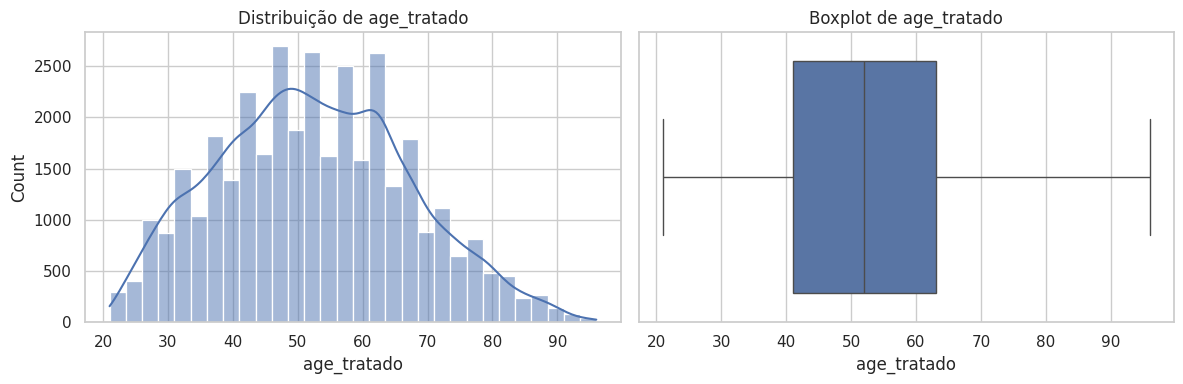


Análise para age_tratado:
- Média: 52.42
- Mediana: 52.00
- Desvio Padrão: 14.79
- Assimetria: 0.19
- Curtose: -0.49
- Valores únicos: 76


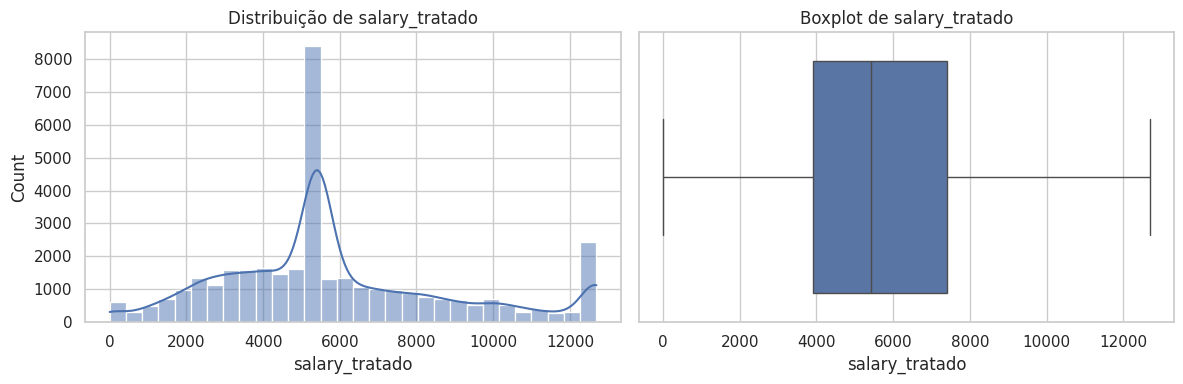


Análise para salary_tratado:
- Média: 5885.87
- Mediana: 5416.00
- Desvio Padrão: 3050.98
- Assimetria: 0.64
- Curtose: -0.03
- Valores únicos: 6385


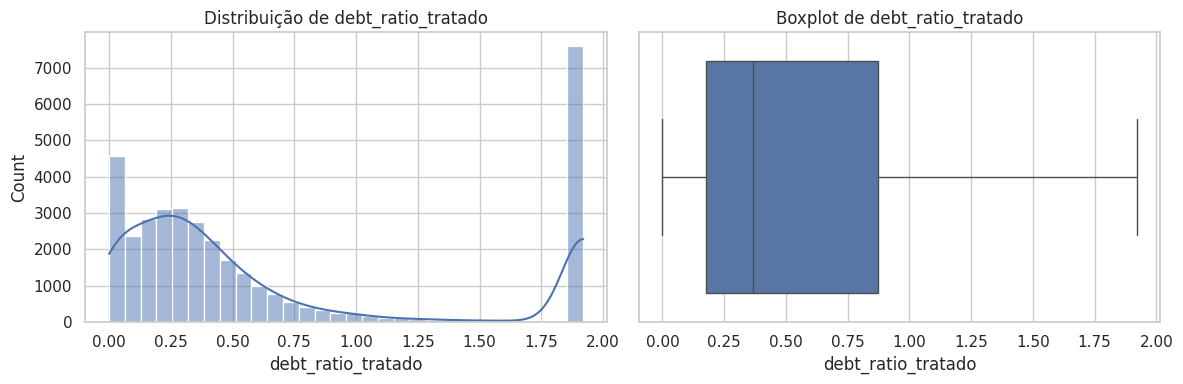


Análise para debt_ratio_tratado:
- Média: 0.67
- Mediana: 0.37
- Desvio Padrão: 0.69
- Assimetria: 1.04
- Curtose: -0.56
- Valores únicos: 26876


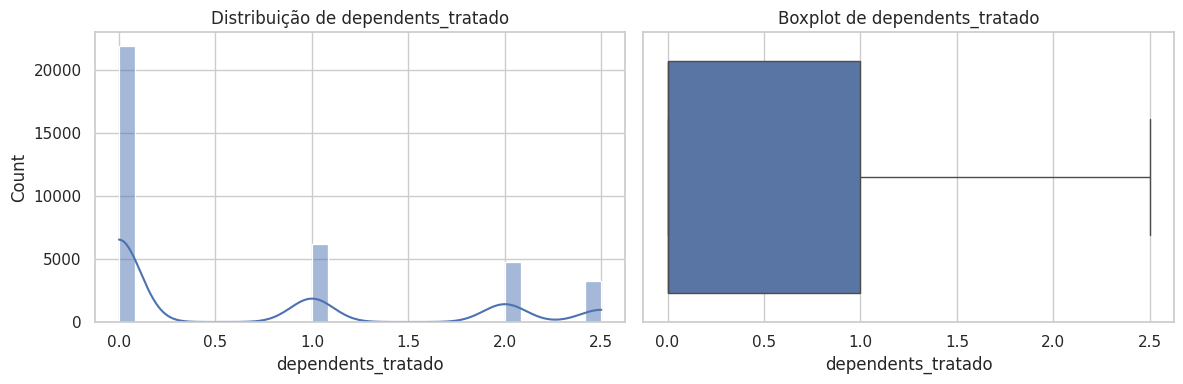


Análise para dependents_tratado:
- Média: 0.66
- Mediana: 0.00
- Desvio Padrão: 0.91
- Assimetria: 0.95
- Curtose: -0.68
- Valores únicos: 4


In [ ]:
# Análise de Distribuição por Variável
# Para variáveis numéricas:
def plot_numeric_distribution(col, log_scale=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma e KDE
    sns.histplot(df[col], kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f'Distribuição de {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')

    if log_scale:
        axes[0].set_xscale('log')
        axes[1].set_xscale('log')

    plt.tight_layout()
    plt.show()

    # Imprimir estatísticas relevantes
    print(f"\nAnálise para {col}:")
    print(f"- Média: {df[col].mean():.2f}")
    print(f"- Mediana: {df[col].median():.2f}")
    print(f"- Desvio Padrão: {df[col].std():.2f}")
    print(f"- Assimetria: {df[col].skew():.2f}")
    print(f"- Curtose: {df[col].kurt():.2f}")
    print(f"- Valores únicos: {df[col].nunique()}")

# Exemplo de uso para variáveis importantes
for col in ['age_tratado', 'salary_tratado', 'debt_ratio_tratado', 'dependents_tratado']:
    log_scale = True if col in ['last_month_salary', 'debt_ratio'] else False
    plot_numeric_distribution(col, log_scale)

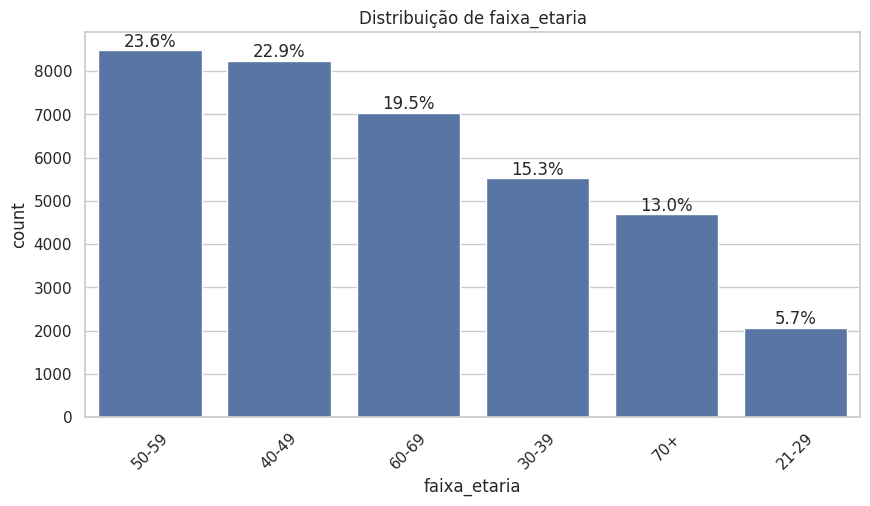

,proportion
faixa_etaria,
50-59,23.50
40-49,22.90
60-69,19.50
30-39,15.30
70+,13.00
21-29,5.70


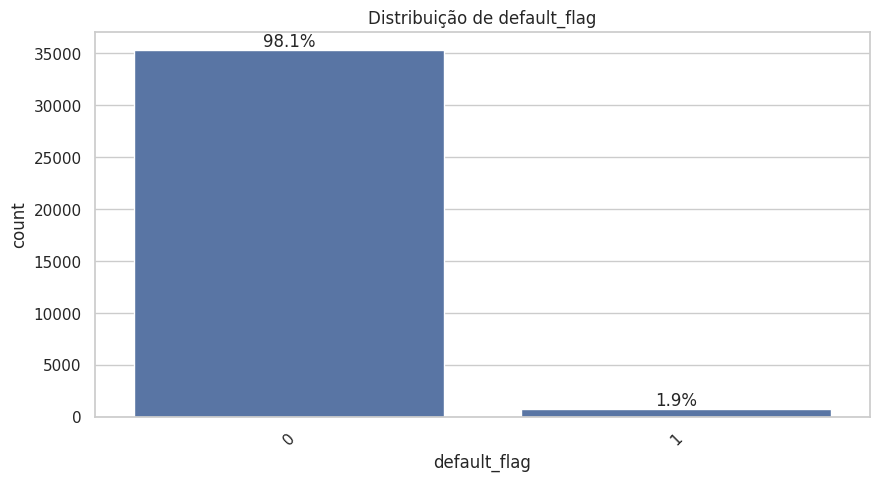

,proportion
default_flag,
0,98.10
1,1.90


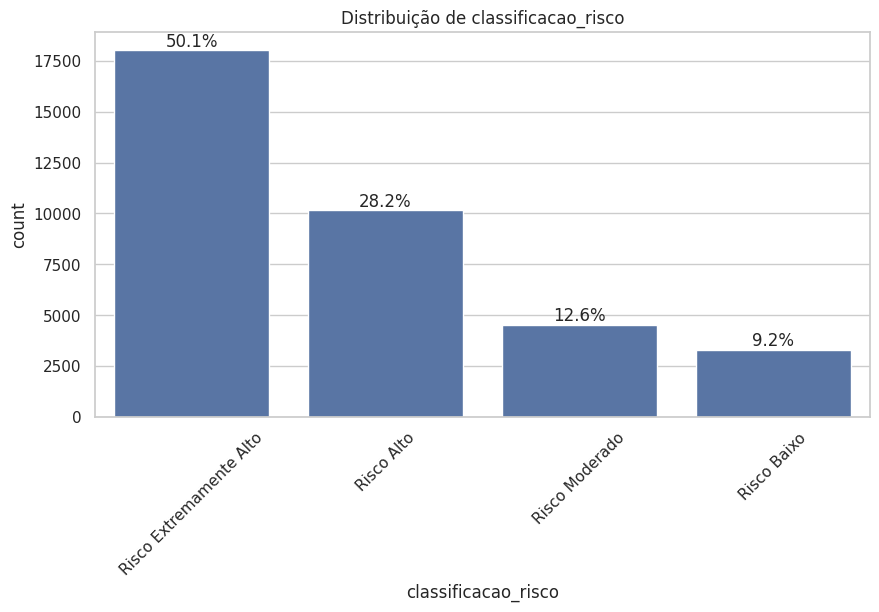

,proportion
classificacao_risco,
Risco Extremamente Alto,50.10
Risco Alto,28.20
Risco Moderado,12.60
Risco Baixo,9.20


In [ ]:
# Para variáveis categóricas:
def plot_categorical_distribution(col):
    plt.figure(figsize=(10, 5))

    # Gráfico de contagem
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)

    # Adicionar porcentagens
    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

    # Tabela de frequências
    freq_table = df[col].value_counts(normalize=True).mul(100).round(1)
    display(freq_table)

# Exemplo de uso
for col in ['faixa_etaria', 'default_flag', 'classificacao_risco']:
    plot_categorical_distribution(col)

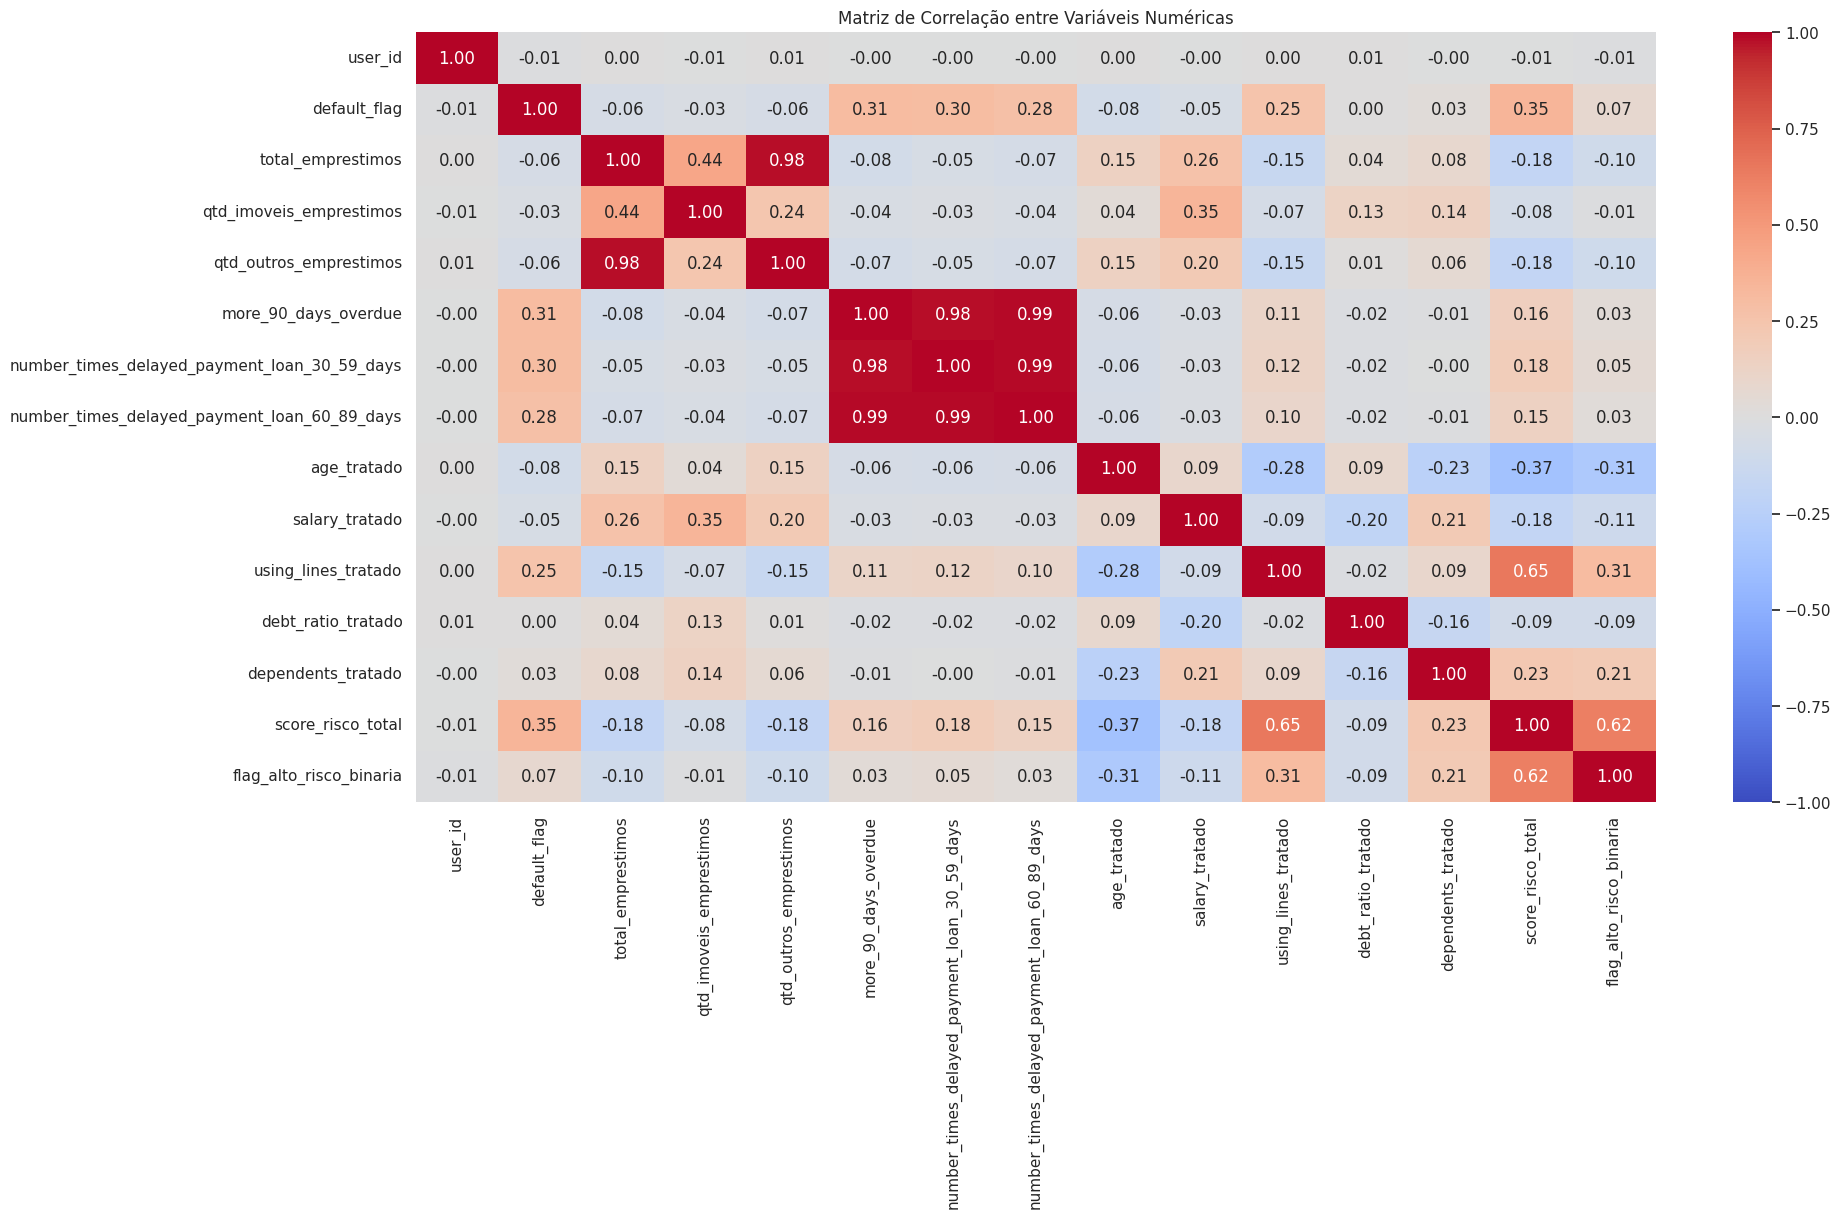

In [ ]:
# Análise de Relacionamento entre Variáveis
# Calcular matriz de correlação
corr_matrix = df[numeric_cols].corr()

# Plotar heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

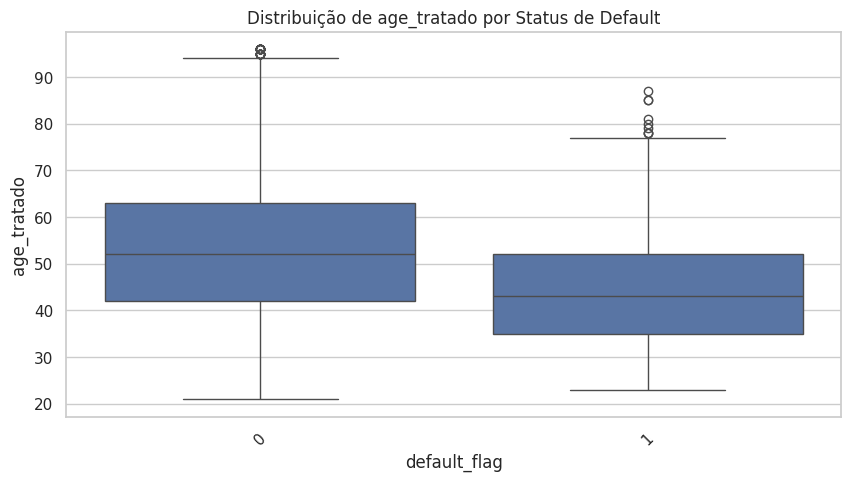

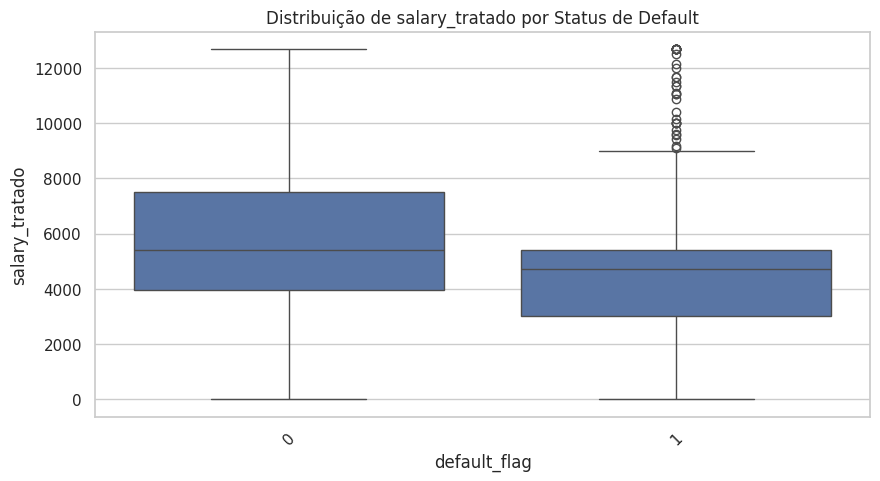

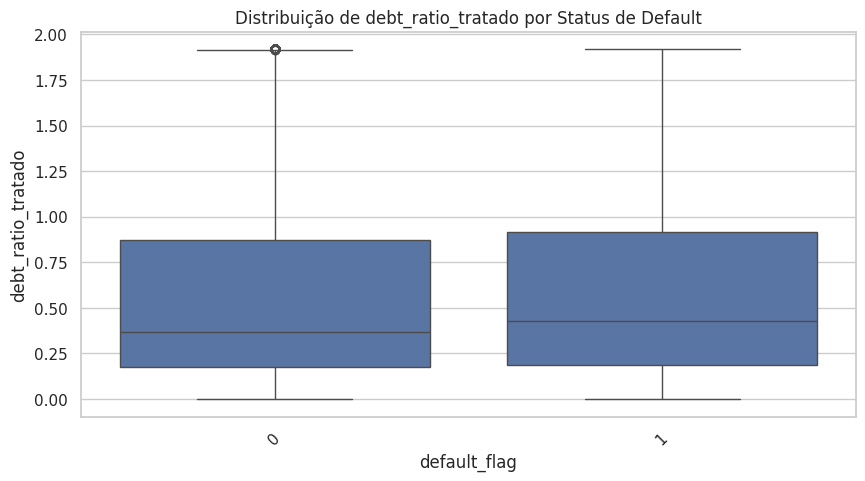

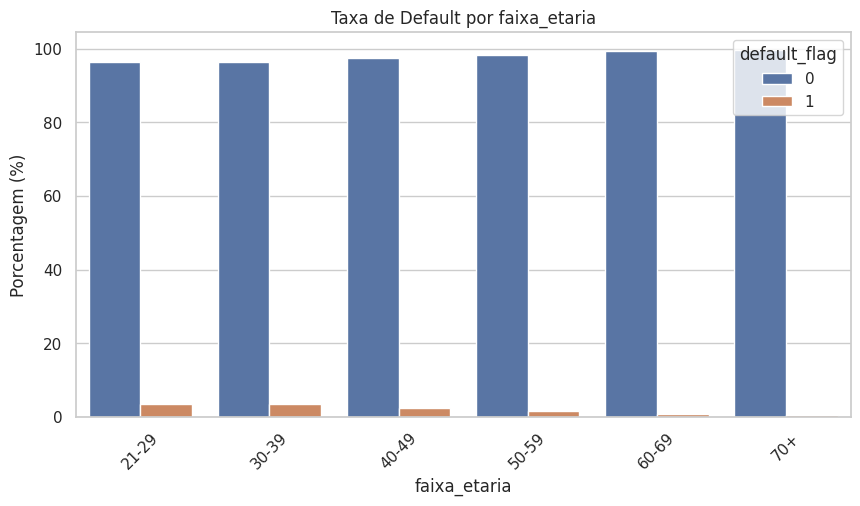

In [ ]:
# Análise bivariada com variável target (default_flag):
def plot_target_analysis(col, numeric=True):
    plt.figure(figsize=(10, 5))

    if numeric:
        # Para variáveis numéricas
        sns.boxplot(data=df, x='default_flag', y=col)
        plt.title(f'Distribuição de {col} por Status de Default')
    else:
        # Para variáveis categóricas
        prop_df = (df.groupby(col)['default_flag']
                  .value_counts(normalize=True)
                  .mul(100)
                  .rename('percent')
                  .reset_index())

        sns.barplot(data=prop_df, x=col, y='percent', hue='default_flag')
        plt.title(f'Taxa de Default por {col}')
        plt.ylabel('Porcentagem (%)')

    plt.xticks(rotation=45)
    plt.show()

# Exemplo de uso
for col in ['age_tratado', 'salary_tratado', 'debt_ratio_tratado',  'faixa_etaria']:
    numeric = True if col in numeric_cols else False
    plot_target_analysis(col, numeric)

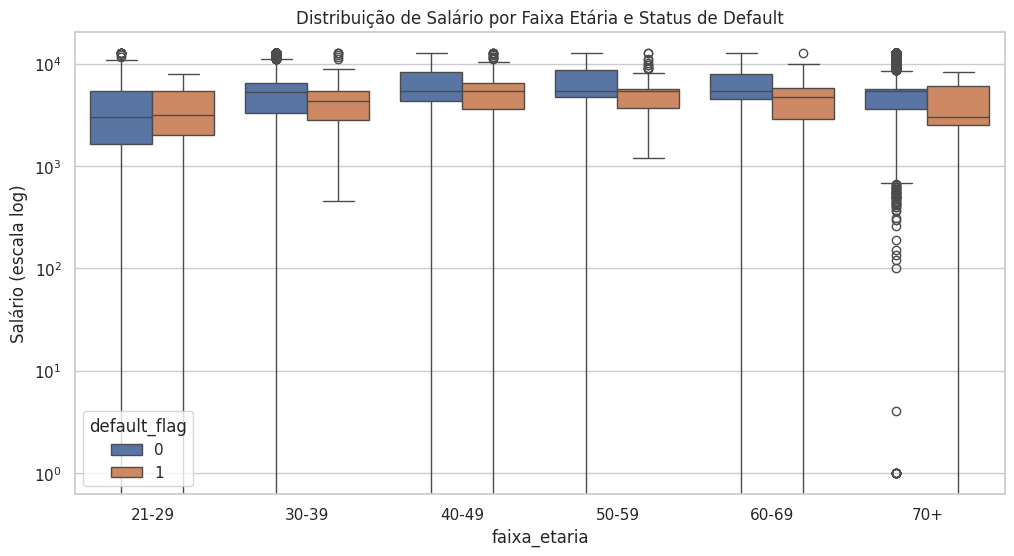

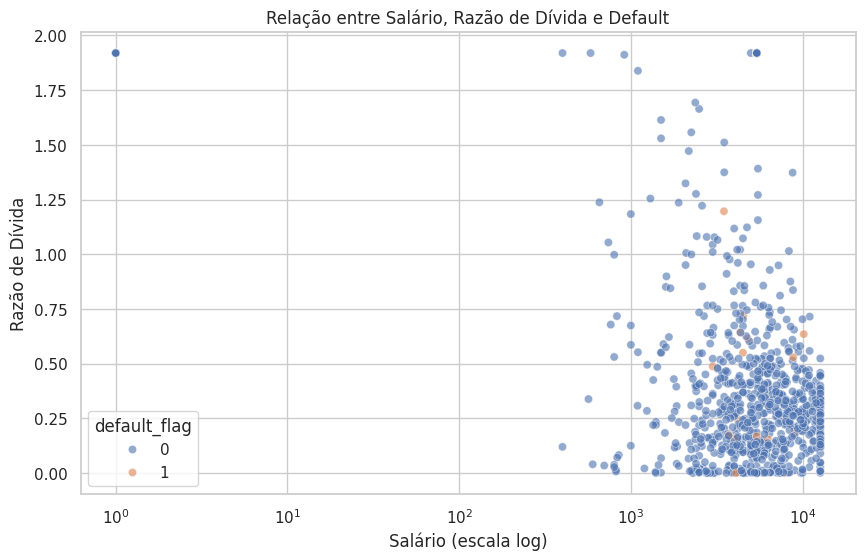

In [ ]:
# Segmentação e Análise Multivariada
# Segmentação por faixa etária e análise de renda vs default
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='faixa_etaria', y='salary_tratado', hue='default_flag')
plt.title('Distribuição de Salário por Faixa Etária e Status de Default')
plt.yscale('log')  # Usando escala log para melhor visualização
plt.ylabel('Salário (escala log)')
plt.show()

# Análise de dívida vs renda
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(1000),  # Amostra para melhor visualização
                x='salary_tratado',
                y='debt_ratio_tratado',
                hue='default_flag',
                alpha=0.6)
plt.xscale('log')
plt.title('Relação entre Salário, Razão de Dívida e Default')
plt.xlabel('Salário (escala log)')
plt.ylabel('Razão de Dívida')
plt.show()

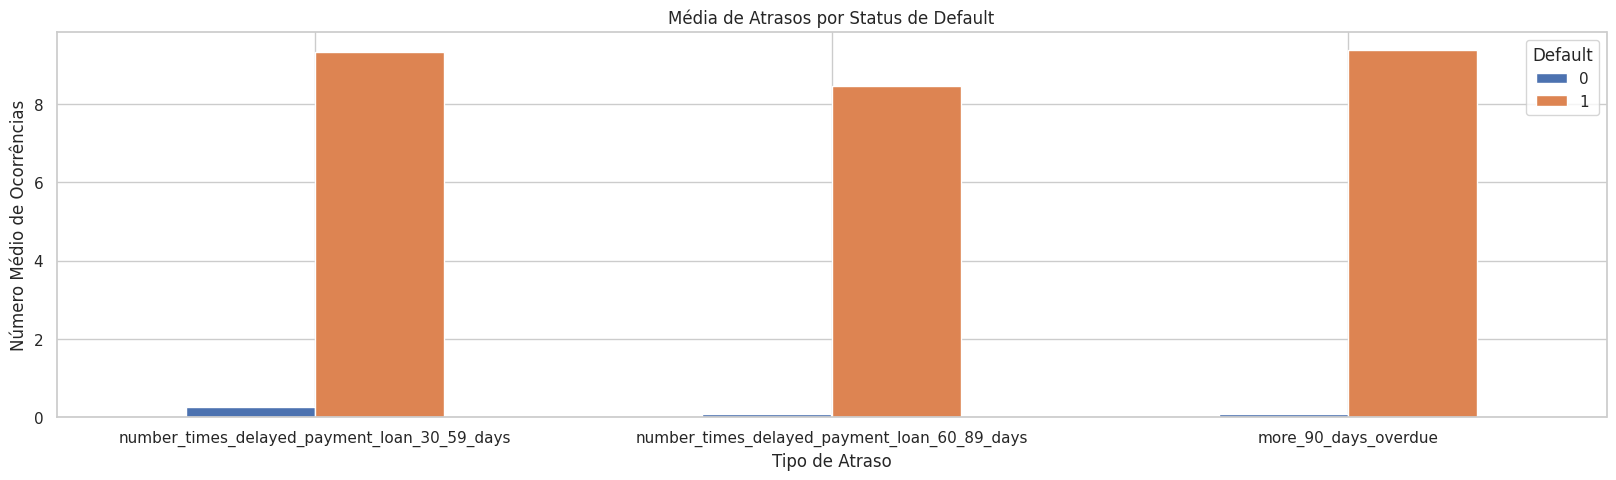

In [ ]:
# Análise de Comportamento de Pagamento
# Criar um dataframe de métricas de pagamento
payment_metrics = df[['default_flag',
                     'number_times_delayed_payment_loan_30_59_days',
                     'number_times_delayed_payment_loan_60_89_days',
                     'more_90_days_overdue']]

# Agregar por status de default
payment_summary = payment_metrics.groupby('default_flag').mean().T

# Plotar
payment_summary.plot(kind='bar', figsize=(20, 5))
plt.title('Média de Atrasos por Status de Default')
plt.ylabel('Número Médio de Ocorrências')
plt.xlabel('Tipo de Atraso')
plt.xticks(rotation=0)
plt.legend(title='Default')
plt.show()

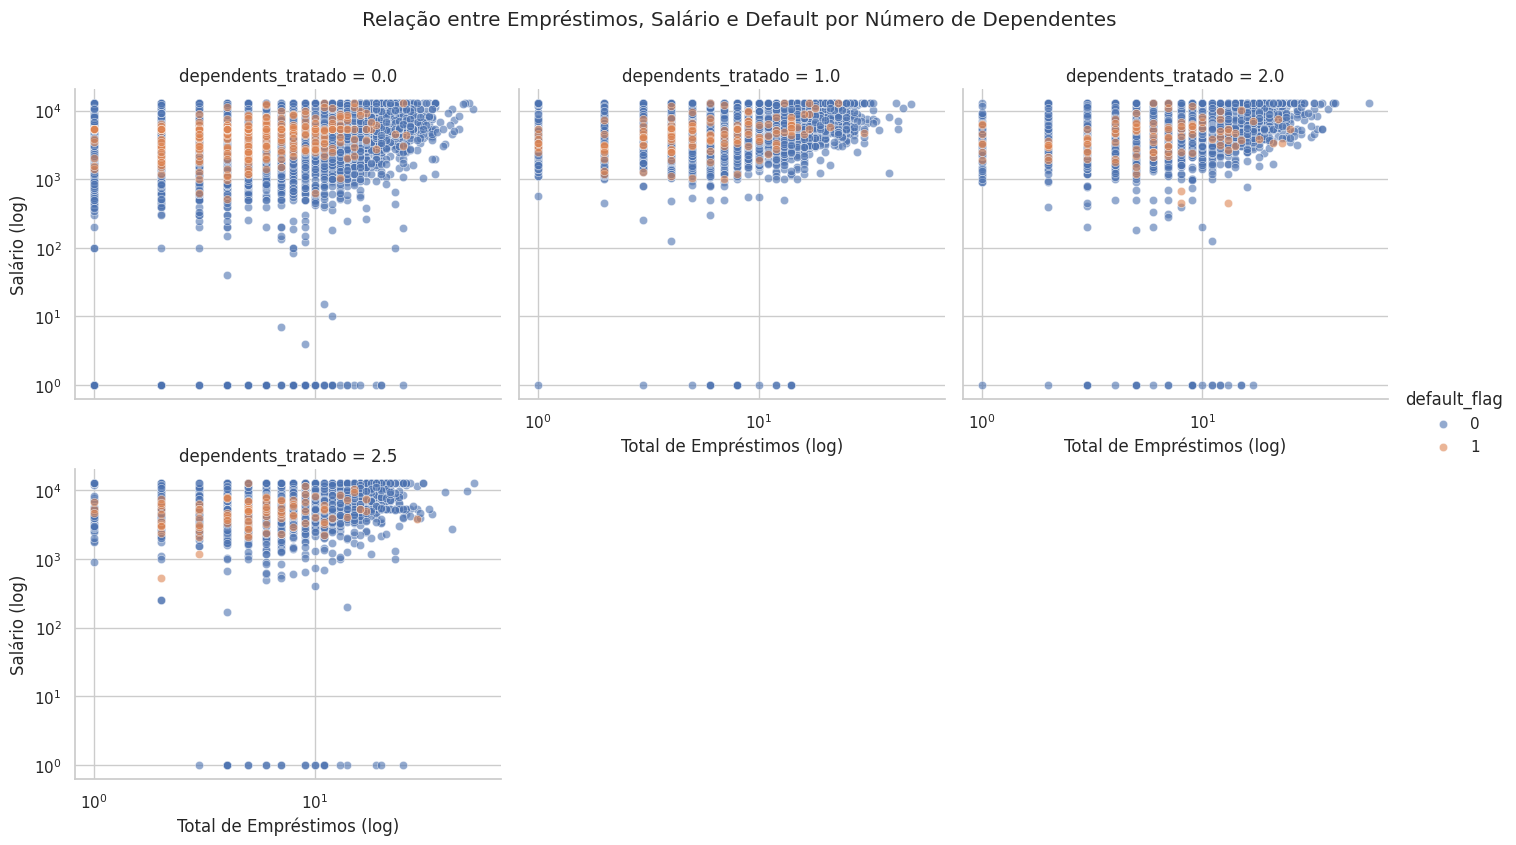

In [ ]:
# Análise de Empréstimos e Dependents
# Criar grid de análise
g = sns.FacetGrid(data=df, col='dependents_tratado', hue='default_flag',
                 col_wrap=3, height=4, aspect=1.2)
g.map(sns.scatterplot, 'total_emprestimos', 'salary_tratado', alpha=0.6)
g.add_legend()
g.set(xscale='log', yscale='log')
g.set_axis_labels('Total de Empréstimos (log)', 'Salário (log)')
plt.suptitle('Relação entre Empréstimos, Salário e Default por Número de Dependentes', y=1.05)
plt.show()

In [ ]:
# Identificação de Outliers
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nAnálise de Outliers para {col}:")
    print(f"- Limite inferior: {lower_bound:.2f}")
    print(f"- Limite superior: {upper_bound:.2f}")
    print(f"- Número de outliers: {len(outliers)}")
    print(f"- Porcentagem de outliers: {len(outliers)/len(df)*100:.2f}%")

    return outliers

# Exemplo para variáveis chave
for col in ['salary_tratado', 'debt_ratio_tratado', 'age_tratado', 'total_emprestimos']:
    outliers = detect_outliers(col)


Análise de Outliers para salary_tratado:
- Limite inferior: -1374.00
- Limite superior: 12690.00
- Número de outliers: 0
- Porcentagem de outliers: 0.00%

Análise de Outliers para debt_ratio_tratado:
- Limite inferior: -0.87
- Limite superior: 1.92
- Número de outliers: 0
- Porcentagem de outliers: 0.00%

Análise de Outliers para age_tratado:
- Limite inferior: 8.00
- Limite superior: 96.00
- Número de outliers: 0
- Porcentagem de outliers: 0.00%

Análise de Outliers para total_emprestimos:
- Limite inferior: -4.00
- Limite superior: 20.00
- Número de outliers: 975
- Porcentagem de outliers: 2.71%


In [ ]:
import pandas as pd
from google.colab import auth
from google.cloud import bigquery
import numpy as np

def calcular_matriz_confusao(y_verdadeiro, y_previsto):
    """
    Calcula a matriz de confusão (TP, TN, FP, FN) manualmente.

    Args:
        y_verdadeiro (pd.Series): Valores reais (True/False, 1/0).
        y_previsto (pd.Series): Valores previstos (True/False, 1/0).

    Returns:
        dict: Um dicionário com os valores da matriz de confusão.
    """
    y_verdadeiro = y_verdadeiro.astype(int)
    y_previsto = y_previsto.astype(int)

    tp = np.sum((y_verdadeiro == 1) & (y_previsto == 1))
    tn = np.sum((y_verdadeiro == 0) & (y_previsto == 0))
    fp = np.sum((y_verdadeiro == 0) & (y_previsto == 1))
    fn = np.sum((y_verdadeiro == 1) & (y_previsto == 0))

    return {
        "True Positives (TP)": int(tp),
        "True Negatives (TN)": int(tn),
        "False Positives (FP)": int(fp),
        "False Negatives (FN)": int(fn)
    }

# --- Conectar ao BigQuery via Colab ---
# Esta etapa irá abrir uma janela para você se autenticar
print("Iniciando autenticação no Colab...")
auth.authenticate_user()
print("Autenticação concluída.")

# Crie um cliente BigQuery para a comunicação
project_id = 'my-project-laboratoria' # SUBSTITUA pelo ID do seu projeto
client = bigquery.Client(project=project_id)

# --- Carregar os dados da sua tabela tb_score_credito ---
# Esta é a parte mais importante. Usamos uma query SQL para carregar apenas as colunas necessárias.
query = """
SELECT
  default_flag,
  flag_alto_risco_binaria
FROM
  `my-project-laboratoria.dadoslaboratorioproject03.tb_score_dummy`
"""

# Execute a query e carregue os resultados em um DataFrame do Pandas
df_score = client.query(query).to_dataframe()

# --- Calcular a matriz de confusão ---
matriz_confusao = calcular_matriz_confusao(
    y_verdadeiro=df_score['default_flag'],
    y_previsto=df_score['flag_alto_risco_binaria']
)

# Exibir os resultados
print("\n--- Matriz de Confusão ---")
print(f"Verdadeiros Positivos (TP): {matriz_confusao['True Positives (TP)']}")
print(f"Verdadeiros Negativos (TN): {matriz_confusao['True Negatives (TN)']}")
print(f"Falsos Positivos (FP): {matriz_confusao['False Positives (FP)']}")
print(f"Falsos Negativos (FN): {matriz_confusao['False Negatives (FN)']}")
print("--------------------------")

print("\n--- Verificando Falsos Negativos ---")
falsos_negativos = df_score[(df_score['default_flag'] == 1) & (df_score['flag_alto_risco_binaria'] == 0)]
print(f"Número de Falsos Negativos encontrados: {len(falsos_negativos)}")
print("-----------------------------------")

Iniciando autenticação no Colab...
Autenticação concluída.

--- Matriz de Confusão ---
Verdadeiros Positivos (TP): 683
Verdadeiros Negativos (TN): 7834
Falsos Positivos (FP): 27483
Falsos Negativos (FN): 0
--------------------------

--- Verificando Falsos Negativos ---
Número de Falsos Negativos encontrados: 0
-----------------------------------


Iniciando autenticação no Colab...
Autenticação concluída.
--- Avaliação do Modelo ---

Matriz de Confusão:
TP: 127 | TN: 6656 | FP: 409 | FN: 8

Métricas de Desempenho:
Acurácia (Accuracy): 0.9421
Precisão (Precision): 0.2369
Recall: 0.9407
F1 Score: 0.3785


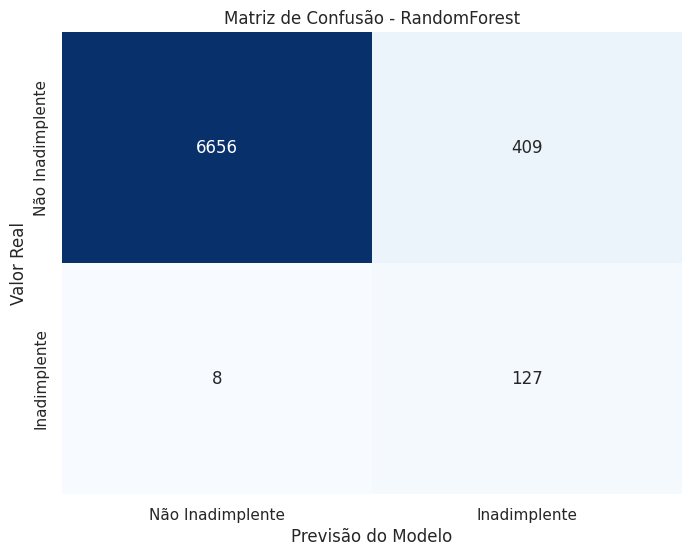

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery

# --- Conectar ao BigQuery via Colab ---
# Esta etapa irá abrir uma janela para você se autenticar
print("Iniciando autenticação no Colab...")
auth.authenticate_user()
print("Autenticação concluída.")

# Crie um cliente BigQuery para a comunicação
project_id = 'my-project-laboratoria' # SUBSTITUA pelo ID do seu projeto
client = bigquery.Client(project=project_id)


# Carregar os dados (substitua o caminho, se necessário)
query = """
SELECT
  default_flag,
  dummy_risco_age,
  dummy_risco_salary,
  dummy_risco_dependent,
  dummy_risco_using_lines,
  dummy_risco_qtd_emprestimos,
  dummy_risco_delayed_30_59,
  dummy_risco_delayed_60_89,
  dummy_risco_more_90,
  dummy_risco_debt_ratio
FROM
  `my-project-laboratoria.dadoslaboratorioproject03.tb_score_dummy`
"""

df = client.query(query).to_dataframe()

# --- Corrigir o tipo de dado das colunas de quartil para inteiro ---
# O erro "float64 to int64" acontece aqui. Essa linha de código força a conversão.
for col in ['dummy_risco_age','dummy_risco_salary', 'dummy_risco_dependent', 'dummy_risco_using_lines',
            'dummy_risco_qtd_emprestimos', 'dummy_risco_delayed_30_59', 'dummy_risco_delayed_60_89','dummy_risco_more_90','dummy_risco_debt_ratio']:
    df[col] = df[col].astype(int)

# Separar as variáveis de entrada (features) e a variável de saída (target)
# As variáveis de quartil são ideais para modelos de Machine Learning
features = [
    'dummy_risco_age', 'dummy_risco_salary', 'dummy_risco_dependent', 'dummy_risco_using_lines',
    'dummy_risco_qtd_emprestimos', 'dummy_risco_delayed_30_59', 'dummy_risco_delayed_60_89','dummy_risco_more_90','dummy_risco_debt_ratio'
]
X = df[features]
y = df['default_flag']

# Dividir os dados em conjuntos de treino e teste
# Test_size = 0.2 significa que 20% dos dados serão usados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Usar SMOTE para balancear a classe minoritária (default_flag = 1) no conjunto de treino
# Isso ajuda o modelo a aprender melhor sobre os casos de inadimplência
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo de Machine Learning (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Fazer previsões no conjunto de dados de teste
y_pred = model.predict(X_test)

# --- Avaliação do Modelo e Matriz de Confusão ---
print("--- Avaliação do Modelo ---")

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("\nMatriz de Confusão:")
print(f"TP: {tp} | TN: {tn} | FP: {fp} | FN: {fn}")

# Calcular e exibir as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas de Desempenho:")
print(f'Acurácia (Accuracy): {accuracy:.4f}')
print(f'Precisão (Precision): {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# --- Visualizar a Matriz de Confusão ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - RandomForest')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.xticks([0.5, 1.5], ['Não Inadimplente', 'Inadimplente'])
plt.yticks([0.5, 1.5], ['Não Inadimplente', 'Inadimplente'])
plt.show()


Iniciando autenticação no Colab...
Autenticação concluída.
--- Avaliação do Modelo ---

Matriz de Confusão:
TP: 409 | TN: 35121 | FP: 196 | FN: 274

Métricas de Desempenho:
Acurácia (Accuracy): 0.9869
Precisão (Precision): 0.6760
Recall: 0.5988
F1 Score: 0.6351


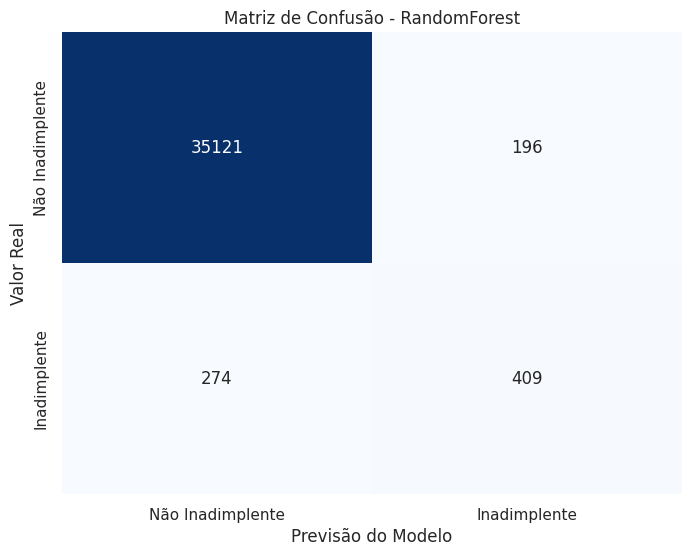

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery

# --- Conectar ao BigQuery via Colab ---
# Esta etapa irá abrir uma janela para você se autenticar
print("Iniciando autenticação no Colab...")
auth.authenticate_user()
print("Autenticação concluída.")

# Crie um cliente BigQuery para a comunicação
project_id = 'my-project-laboratoria' # SUBSTITUA pelo ID do seu projeto
client = bigquery.Client(project=project_id)


# Carregar os dados (substitua o caminho, se necessário)
query = """
SELECT
  default_flag,
  dummy_risco_age,
  dummy_risco_salary,
  dummy_risco_dependent,
  dummy_risco_using_lines,
  dummy_risco_qtd_emprestimos,
  dummy_risco_delayed_30_59,
  dummy_risco_delayed_60_89,
  dummy_risco_more_90,
  dummy_risco_debt_ratio,
  flag_alto_risco_binaria,
  score_risco_total,
  dummy_risco_imoveis,
  dummy_risco_outros

FROM
  `my-project-laboratoria.dadoslaboratorioproject03.tb_score_dummy`
"""

df = client.query(query).to_dataframe()

# --- Corrigir o tipo de dado das colunas de quartil para inteiro ---
# O erro "float64 to int64" acontece aqui. Essa linha de código força a conversão.
for col in ['dummy_risco_age','dummy_risco_salary', 'dummy_risco_dependent', 'dummy_risco_using_lines',
            'dummy_risco_qtd_emprestimos', 'dummy_risco_delayed_30_59', 'dummy_risco_delayed_60_89','dummy_risco_more_90','dummy_risco_debt_ratio','score_risco_total']:
    df[col] = df[col].astype(int)

# Separar as variáveis de entrada (features) e a variável de saída (target)
# As variáveis de quartil são ideais para modelos de Machine Learning
features = [
    'dummy_risco_age', 'dummy_risco_salary', 'dummy_risco_dependent', 'dummy_risco_using_lines',
    'dummy_risco_qtd_emprestimos', 'dummy_risco_delayed_30_59', 'dummy_risco_delayed_60_89','dummy_risco_more_90','dummy_risco_debt_ratio','dummy_risco_outros','dummy_risco_imoveis'
]
X = df[features]
y = df['default_flag']

# --- NOVO TRECHO: Treinar, Prever e Avaliar na base completa ---
# Treinar o modelo de Machine Learning (Random Forest) em TODA a base
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Fazer previsões na base de dados COMPLETA
y_pred = model.predict(X)
# --- FIM NOVO TRECHO ---

# --- Avaliação do Modelo e Matriz de Confusão ---
print("--- Avaliação do Modelo ---")

# Calcular a matriz de confusão
cm = confusion_matrix(y, y_pred) # y_test substituído por y
tn, fp, fn, tp = cm.ravel()
print("\nMatriz de Confusão:")
print(f"TP: {tp} | TN: {tn} | FP: {fp} | FN: {fn}")

# Calcular e exibir as métricas de desempenho
accuracy = accuracy_score(y, y_pred) # y_test substituído por y
precision = precision_score(y, y_pred) # y_test substituído por y
recall = recall_score(y, y_pred) # y_test substituído por y
f1 = f1_score(y, y_pred) # y_test substituído por y

print("\nMétricas de Desempenho:")
print(f'Acurácia (Accuracy): {accuracy:.4f}')
print(f'Precisão (Precision): {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# --- Visualizar a Matriz de Confusão ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - RandomForest')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.xticks([0.5, 1.5], ['Não Inadimplente', 'Inadimplente'])
plt.yticks([0.5, 1.5], ['Não Inadimplente', 'Inadimplente'])
plt.show()